In [150]:
import numpy as np
from scipy.optimize import curve_fit as cf
import matplotlib.pyplot as plt
import scipy.signal as signal

In [3]:
Binary_data = np.loadtxt('Binary_data 2.csv', delimiter=',')
##Binary_data
c=3e8

In [4]:
v1=[] #contains the value of radial velocity 1 as a function of redshift(z)
print('Radial Velocities 1 (m/s)')
for i in range(len(Binary_data)):
    v1.append(c*(((float(Binary_data[i][1])+1)**2)-1)/(((float(Binary_data[i][1])+1)**2)+1))
#print(v1)
mv1=np.mean(v1)
#mv1

Radial Velocities 1 (m/s)


In [5]:
v2=[] #contains the value of radial velocity 2 as a function of redshift(z)
print('Radial Velocities 2 (m/s)')
for i in range(len(Binary_data)):
    v2.append(c*(((float(Binary_data[i][2])+1)**2)-1)/(((float(Binary_data[i][2])+1)**2)+1))
#print(v2)
mv2=np.mean(v2)
#mv2

Radial Velocities 2 (m/s)


In [6]:
t=[]
print('Time Period (sec)')
for i in range(len(Binary_data)):
    t.append(float(Binary_data[i][0])*3.154e7) ##The factor because 1 year= 3.154 x 10^7 sec
#print(t)
T = np.asarray(t) 
#print(T)
#np.mean(T)

Time Period (sec)


In [7]:
def relation(t,a,w,c):
    return a * np.sin(w * t)+c

In [84]:
p_opt1, p_cov1 = cf(relation,T,v1,(3e4,6.33e-8,mv1))
#p_opt2, p_cov2 = cf(relation,v2,T)
print("p_opt for 1st {}".format(p_opt1))

p_opt2, p_cov2 = cf(relation,T,v2,(3e4,6.33e-8,mv2))
#p_opt2
print("p_opt for 2nd {}".format(p_opt2))

p_opt for 1st [-1.45731498e+04  5.61416339e-08  2.61801811e+04]
p_opt for 2nd [1.12137845e+04 5.61416465e-08 2.60352362e+04]


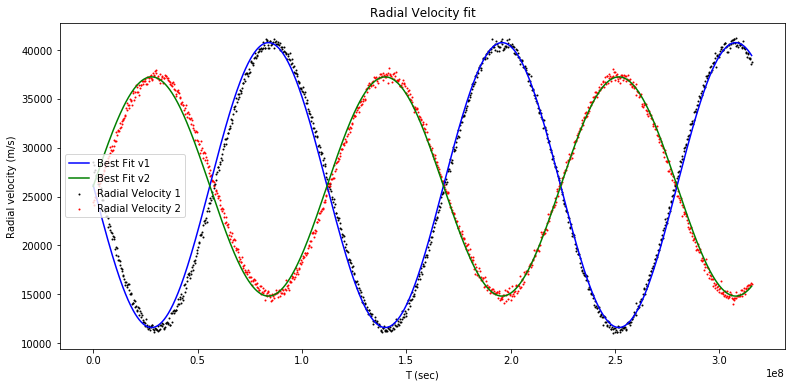

In [85]:
plt.figure(figsize=[13,6])
plt.plot(T,relation(T,*p_opt1),label='Best Fit v1',color='b')
plt.scatter(T,v1,label='Radial Velocity 1',s=1,color='k')
plt.plot(T,relation(T,*p_opt2),label='Best Fit v2',color='g')
plt.scatter(T,v2,label='Radial Velocity 2',s=1,color='r')
plt.xlabel('T (sec)')
plt.ylabel('Radial velocity (m/s)')
plt.title('Radial Velocity fit')
plt.legend()

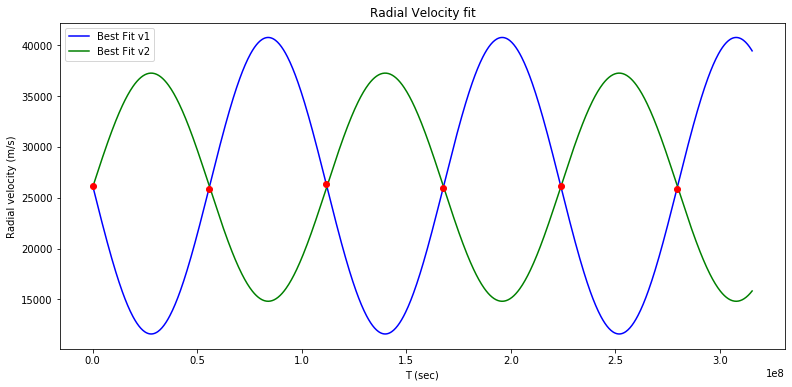

In [207]:
plt.figure(figsize=[13,6])
plt.plot(T,relation(T,*p_opt1),label='Best Fit v1',color='b')
plt.plot(T,relation(T,*p_opt2),label='Best Fit v2',color='g')
idx = np.argwhere(np.diff(np.sign(relation(T,*p_opt1) - relation(T,*p_opt2)))).flatten()
plt.plot(T[idx], relation(T,*p_opt1)[idx], 'ro')
plt.xlabel('T (sec)')
plt.ylabel('Radial velocity (m/s)')
plt.title('Radial Velocity fit')
plt.legend()


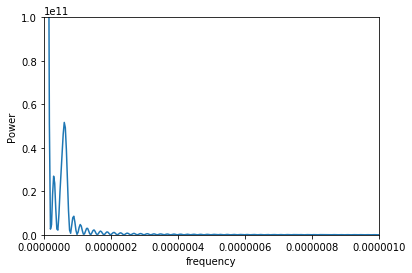

In [344]:
freqs=np.linspace(3.17e-9,3.17e-6,999)
clp=signal.lombscargle(T,v1,freqs)
#plt.figure(figsize=[10,10])
plt.xlabel('frequency')
plt.ylabel('Power')
plt.ylim(0,1e11)
plt.xlim(0,1e-6)
plt.plot(freqs,clp)

#index=np.argmax(clp)
#print(index)
#clp[index]

In [129]:
from gatspy.periodic import LombScargleFast

In [289]:
binary = LombScargleFast().fit(T,v1)
periods, power = binary.periodogram_auto(nyquist_factor=100)

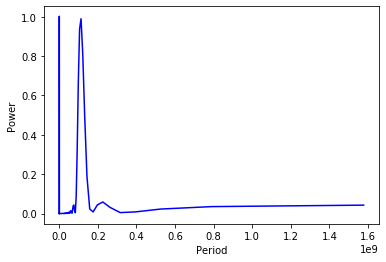

In [334]:
plt.xlabel('Period')
plt.ylabel('Power')
plt.plot(periods, power,color='b')

In [292]:
binary.optimizer.period_range=(1e8, 2e8)
period = binary.best_period
#print("time period = {0} yr".format(time_period/3.154e7))

In [293]:
### CALCULATION OF MASSES
G=6.674e-11
Msun=1.989e30
orb_vel1= np.max(relation(T,*p_opt1))
orb_vel2= np.max(relation(T,*p_opt2)) 
time_period=period                  ##This is the time period appx calculated fron p_opt values(avg) np.pi*((1/p_opt1[1])+(1/p_opt2[1]))
M1=time_period*orb_vel2*((orb_vel1+orb_vel2)**2)/(2*np.pi*G)
M2=time_period*orb_vel1*((orb_vel1+orb_vel2)**2)/(2*np.pi*G)
print('Period of revolution is: {} Yrs'.format(time_period/3.154e7)) #time period in years
print('Mass of lighter star is: {} Solar mass'.format(M1/Msun))      #Mass of star1 in Solar masses
print('Mass of heavier star is: {} Solar mass'.format(M2/Msun))      #Mass of star2 in Solar masses

Period of revolution is: 3.4952813701502965 Yrs
Mass of lighter star is: 29.955205283917607 Solar mass
Mass of heavier star is: 32.77331226624373 Solar mass


In [350]:
(6.674e-11*5.972e24*1/(2*(637100+400)))/1e6

312.604925490196